In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

from ff_energy.uncertainty.uncertainty_quantifier import UncertaintyQuantifier
from ff_energy.ffe.constants import FFEPATH
print(FFEPATH)

csv = FFEPATH / "datasets/silvan/criegee_mp2_avtz_gen3_randomselection_4305_ens6_all.dat"
print(csv)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/boittier/Documents/phd/ff_energy
/home/boittier/Documents/phd/ff_energy/datasets/silvan/criegee_mp2_avtz_gen3_randomselection_4305_ens6_all.dat


In [4]:
df = pd.read_csv(csv, delimiter="  ")

/tmp/ipykernel_205761/1288098332.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(csv, delimiter="  ")


In [5]:
df

,Eref,Ens,Model1,Model2,Model3,Model4,Model5,Model6
0,-30.302610,-30.303969,-30.304491,-30.304039,-30.303816,-30.302113,-30.304005,-30.305349
1,-29.555629,-29.556528,-29.553324,-29.556776,-29.560293,-29.550920,-29.560108,-29.557745
2,-28.771974,-28.771562,-28.760334,-28.771938,-28.784126,-28.766819,-28.775587,-28.770569
3,-28.264171,-28.267426,-28.245617,-28.263954,-28.294741,-28.272991,-28.266968,-28.260286
4,-28.074606,-28.091652,-28.057587,-28.087101,-28.126707,-28.107737,-28.098137,-28.072643
...,...,...,...,...,...,...,...,...
33397,-29.668227,-29.669304,-29.667955,-29.669159,-29.670647,-29.668480,-29.672123,-29.667458
33398,-29.431993,-29.432835,-29.433363,-29.432831,-29.431156,-29.433653,-29.436811,-29.429195
33399,-29.002758,-29.006098,-29.007973,-29.004765,-29.003111,-29.010780,-29.007494,-29.002464
33400,-28.620107,-28.628448,-28.628874,-28.625696,-28.629385,-28.635044,-28.623213,-28.628475


ValueError: x and y must have length at least 2.

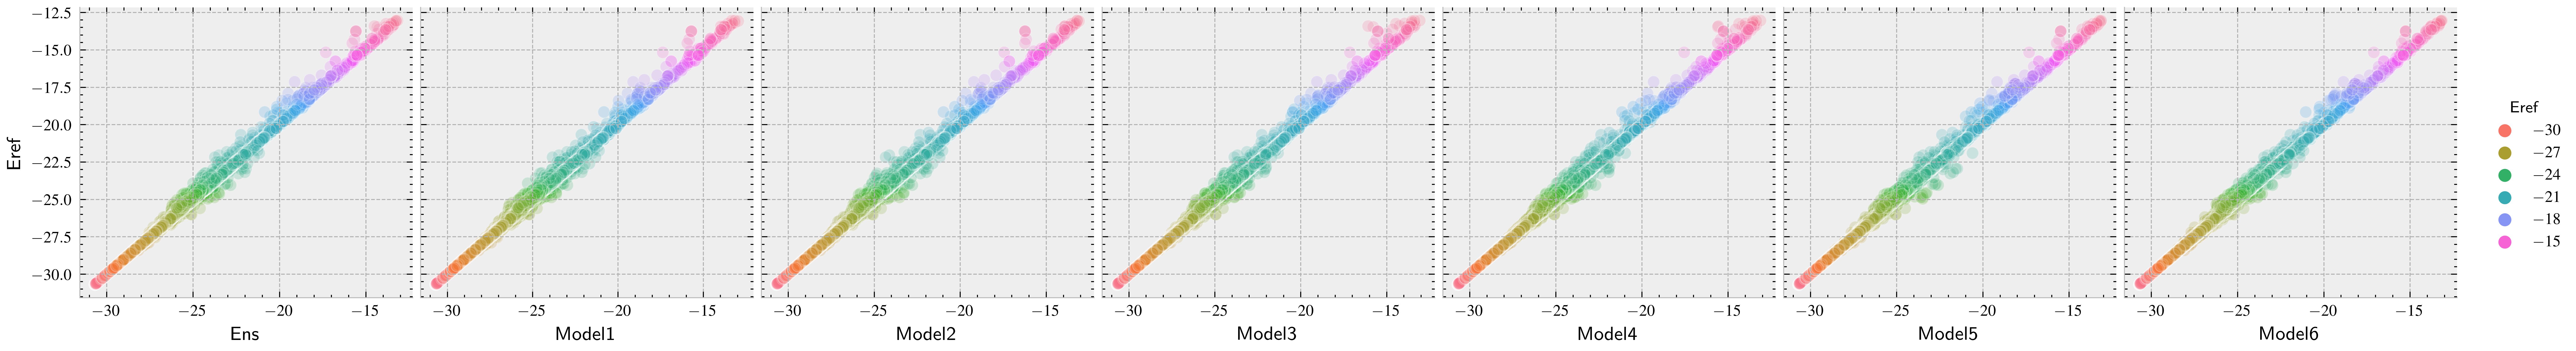

In [111]:
pair_plot = True
x_vars = ["Ens", "Model1", "Model2", "Model3", "Model4", "Model5", "Model6", ]

if pair_plot:
    from ff_energy.uncertainty.plotter import corrfunc

    graph = sns.pairplot(df, x_vars=x_vars, 
                         y_vars=["Eref"], palette="husl", hue="Eref", plot_kws={"alpha": 0.2});
    graph.map(corrfunc)

In [83]:
uq_ = UncertaintyQuantifier(df)

In [103]:
# uq_.calculate_uncertainty(keys=["mapie_uncertainty"])
# uq_.calculate_uncertainty(keys=["conformal_uncertainty"])
uq_.calculate_uncertainty(keys=["bayesian_uncertainty"])

               Eref           Ens        Model1        Model2        Model3  \
count  33402.000000  33402.000000  33402.000000  33402.000000  33402.000000   
mean     -27.681291    -27.691938    -27.691279    -27.692179    -27.693180   
std        2.360599      2.341888      2.342854      2.342449      2.340206   
min      -30.682873    -30.682863    -30.682888    -30.682913    -30.682613   
25%      -29.091112    -29.092351    -29.093180    -29.092933    -29.091634   
50%      -28.278950    -28.280644    -28.280953    -28.281391    -28.280231   
75%      -26.943548    -26.952176    -26.953208    -26.953192    -26.955099   
max      -13.039387    -13.172860    -12.959957    -13.097248    -13.078775   

             Model4        Model5        Model6        TARGET           FIT  \
count  33402.000000  33402.000000  33402.000000  33402.000000  33402.000000   
mean     -27.692061    -27.692164    -27.690763    -27.681291    -27.691938   
std        2.342373      2.341314      2.343089    

sample: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [03:18<00:00, 10.09it/s, 63 steps of size 3.02e-02. acc. prob=0.88]


In [104]:
_ = uq_.conformal_uncertainty

In [105]:
np.mean(abs(_[0] - _[1]))

TypeError: 'NoneType' object is not subscriptable

In [106]:
uq_.bayesian_uncertainty.keys()


dict_keys(['predictions_scaled', 'residuals_scaled', 'df', 'unstandarize', 'residuals_unscaled'])

In [107]:
uq_.bayesian_uncertainty["residuals_unscaled"]

{'obs': array([[-30.30261 , -29.555628, -28.771975, ..., -29.002758, -28.620108,
         -28.336721],
        [-30.30261 , -29.555628, -28.771975, ..., -29.002758, -28.620108,
         -28.336721],
        [-30.30261 , -29.555628, -28.771975, ..., -29.002758, -28.620108,
         -28.336721],
        ...,
        [-30.30261 , -29.555628, -28.771975, ..., -29.002758, -28.620108,
         -28.336721],
        [-30.30261 , -29.555628, -28.771975, ..., -29.002758, -28.620108,
         -28.336721],
        [-30.30261 , -29.555628, -28.771975, ..., -29.002758, -28.620108,
         -28.336721]], dtype=float32),
 'obs_mean': array([[-30.302608],
        [-29.555628],
        [-28.771975],
        ...,
        [-29.002758],
        [-28.620108],
        [-28.336721]], dtype=float32),
 'obs_hpdi': array([[-30.30261 , -29.555628, -28.771975, ..., -29.002758, -28.620108,
         -28.336721],
        [-30.30261 , -29.555628, -28.771975, ..., -29.002758, -28.620108,
         -28.336721]], dtype=fl

In [108]:
uq_.bayesian_uncertainty["residuals_scaled"]

{'obs': Array([[-1.1147889 , -0.7958188 , -0.46118882, ..., -0.55973643,
         -0.39633957, -0.27533022],
        [-1.1147889 , -0.7958188 , -0.46118882, ..., -0.55973643,
         -0.39633957, -0.27533022],
        [-1.1147889 , -0.7958188 , -0.46118882, ..., -0.55973643,
         -0.39633957, -0.27533022],
        ...,
        [-1.1147889 , -0.7958188 , -0.46118882, ..., -0.55973643,
         -0.39633957, -0.27533022],
        [-1.1147889 , -0.7958188 , -0.46118882, ..., -0.55973643,
         -0.39633957, -0.27533022],
        [-1.1147889 , -0.7958188 , -0.46118882, ..., -0.55973643,
         -0.39633957, -0.27533022]], dtype=float32),
 'obs_mean': Array([-1.1147885 , -0.7958185 , -0.46118906, ..., -0.5597364 ,
        -0.3963395 , -0.2753302 ], dtype=float32),
 'obs_hpdi': array([[-1.1147889 , -0.7958188 , -0.46118882, ..., -0.55973643,
         -0.39633957, -0.27533022],
        [-1.1147889 , -0.7958188 , -0.46118882, ..., -0.55973643,
         -0.39633957, -0.27533022]], dtype=

In [109]:
uq_.data

,Eref,Ens,Model1,Model2,Model3,Model4,Model5,Model6,TARGET,FIT,SE,FIT_scaled,TARGET_scaled,SE_scaled
0,-30.302610,-30.303969,-30.304491,-30.304039,-30.303816,-30.302113,-30.304005,-30.305349,-30.302610,-30.303969,0.012814,-1.115369,-1.114789,0.005472
1,-29.555629,-29.556528,-29.553324,-29.556776,-29.560293,-29.550920,-29.560108,-29.557745,-29.555629,-29.556528,0.012814,-0.796203,-0.795819,0.005472
2,-28.771974,-28.771562,-28.760334,-28.771938,-28.784126,-28.766819,-28.775587,-28.770569,-28.771974,-28.771562,0.012814,-0.461013,-0.461189,0.005472
3,-28.264171,-28.267426,-28.245617,-28.263954,-28.294741,-28.272991,-28.266968,-28.260286,-28.264171,-28.267426,0.012814,-0.245741,-0.244351,0.005472
4,-28.074606,-28.091652,-28.057587,-28.087101,-28.126707,-28.107737,-28.098137,-28.072643,-28.074606,-28.091652,0.012814,-0.170683,-0.163404,0.005472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33397,-29.668227,-29.669304,-29.667955,-29.669159,-29.670647,-29.668480,-29.672123,-29.667458,-29.668227,-29.669304,0.012814,-0.844359,-0.843900,0.005472
33398,-29.431993,-29.432835,-29.433363,-29.432831,-29.431156,-29.433653,-29.436811,-29.429195,-29.431993,-29.432835,0.012814,-0.743384,-0.743025,0.005472
33399,-29.002758,-29.006098,-29.007973,-29.004765,-29.003111,-29.010780,-29.007494,-29.002464,-29.002758,-29.006098,0.012814,-0.561162,-0.559736,0.005472
33400,-28.620107,-28.628448,-28.628874,-28.625696,-28.629385,-28.635044,-28.623213,-28.628475,-28.620107,-28.628448,0.012814,-0.399901,-0.396340,0.005472


In [86]:
# plt.scatter(*uq_.bayesian_uncertainty["residuals_unscaled"]["obs_hpdi"])